<a href="https://colab.research.google.com/github/DuaIlyas24/mall-customer-segmentation/blob/main/notebook/customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
# Data Manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Styling for plots
sns.set(style="whitegrid")


In [11]:
import pandas as pd

url = "https://raw.githubusercontent.com/DuaIlyas24/mall-customer-segmentation/refs/heads/main/data/mall_customers.csv"

df = pd.read_csv(url)

df.head()


,CustomerID,Gender,Age,Education,Marital Status,Annual Income (k$),Spending Score (1-100)
0,1,M,19,High School,Married,15,39
1,2,M,21,Graduate,Single,15,81
2,3,F,20,Graduate,Married,16,6
3,4,F,23,High School,Unknown,16,77
4,5,F,31,Uneducated,Married,17,40


In [12]:
print("Shape of dataset:", df.shape)
print("\nInfo:")
print(df.info())
print("\nSummary statistics:")
print(df.describe())



Shape of dataset: (200, 7)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Education               200 non-null    object
 4   Marital Status          200 non-null    object
 5   Annual Income (k$)      200 non-null    int64 
 6   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 11.1+ KB
None

Summary statistics:
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   1

In [13]:
# Remove duplicates
df.drop_duplicates(inplace=True)

# Check missing values
print(df.isnull().sum())



CustomerID                0
Gender                    0
Age                       0
Education                 0
Marital Status            0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


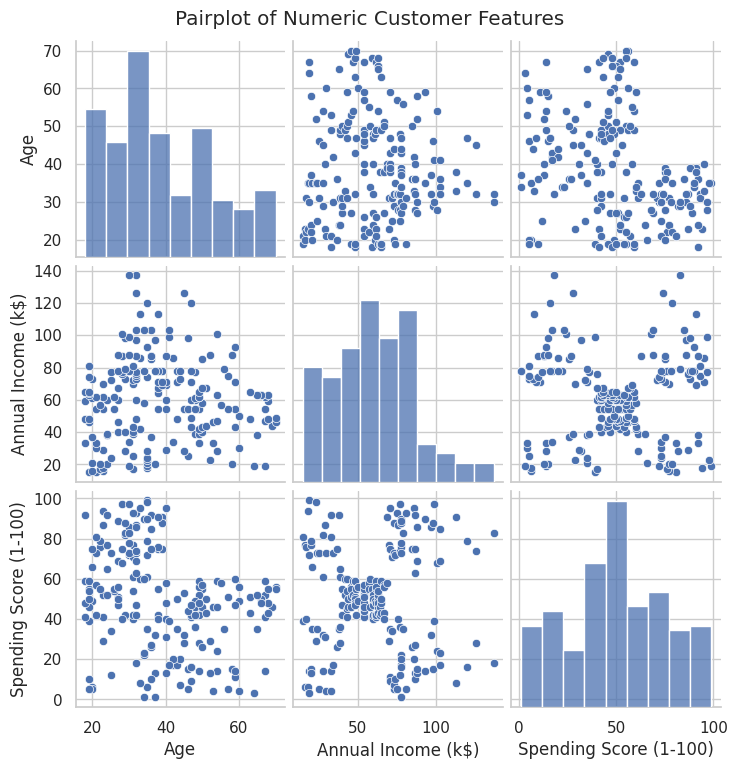

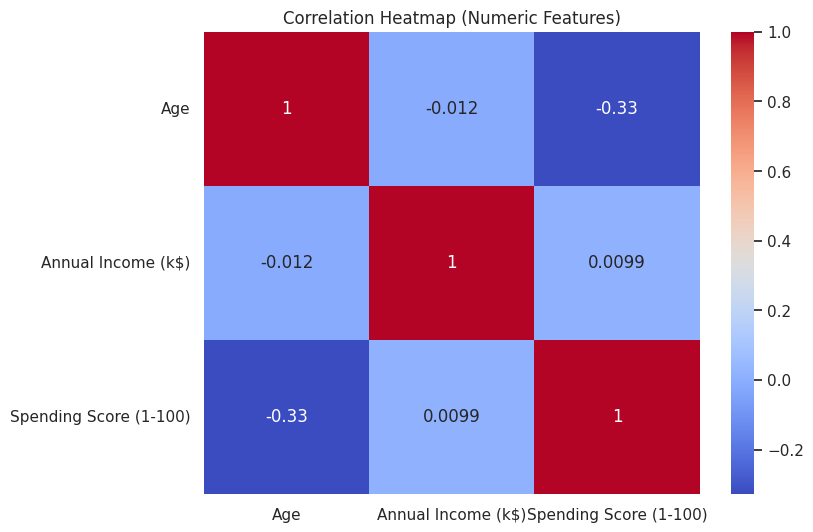

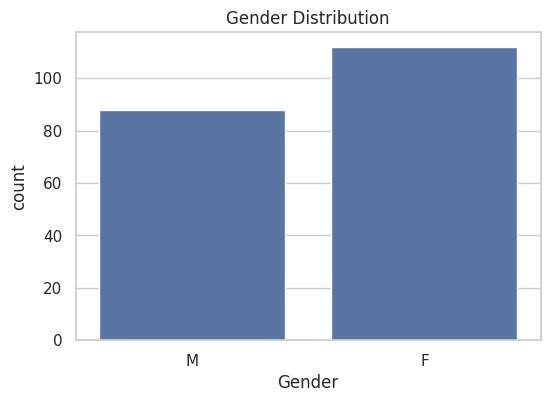

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pairplot for numeric features
numeric_cols = ['Age','Annual Income (k$)','Spending Score (1-100)']
pairplot_fig = sns.pairplot(df[numeric_cols])
pairplot_fig.fig.suptitle("Pairplot of Numeric Customer Features", y=1.02)
pairplot_fig.savefig('pairplot_numeric_features.png')  # saves as PNG
plt.show()

# Correlation heatmap (numeric only)
plt.figure(figsize=(8,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Numeric Features)")
plt.savefig('correlation_heatmap.png')  # saves as PNG
plt.show()

# Distribution of Gender
plt.figure(figsize=(6,4))
sns.countplot(x='Gender', data=df)
plt.title("Gender Distribution")
plt.savefig('gender_distribution.png')  # saves as PNG
plt.show()



In [15]:
# Use only numeric features for clustering
X = df[['Age','Annual Income (k$)','Spending Score (1-100)']]
X.head()



,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [17]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


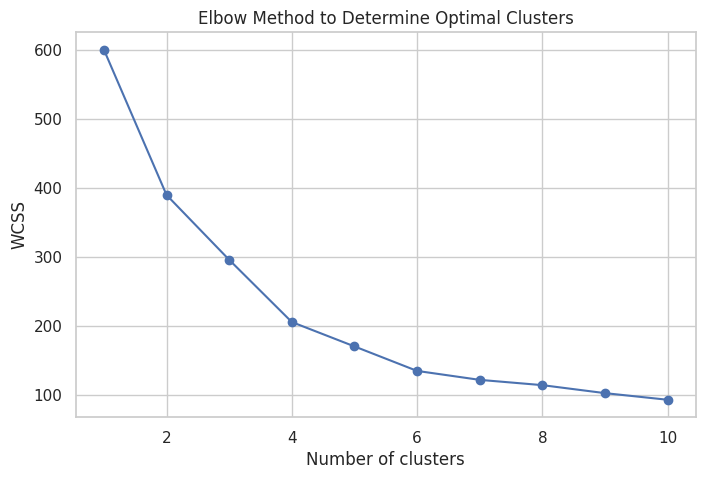

In [25]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1,11), wcss, marker='o')
plt.title("Elbow Method to Determine Optimal Clusters")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")

# Save the plot as an image
plt.savefig('elbow_method.png')

plt.show()



In [19]:
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)
df.head()


,CustomerID,Gender,Age,Education,Marital Status,Annual Income (k$),Spending Score (1-100),Cluster
0,1,M,19,High School,Married,15,39,2
1,2,M,21,Graduate,Single,15,81,2
2,3,F,20,Graduate,Married,16,6,3
3,4,F,23,High School,Unknown,16,77,2
4,5,F,31,Uneducated,Married,17,40,2


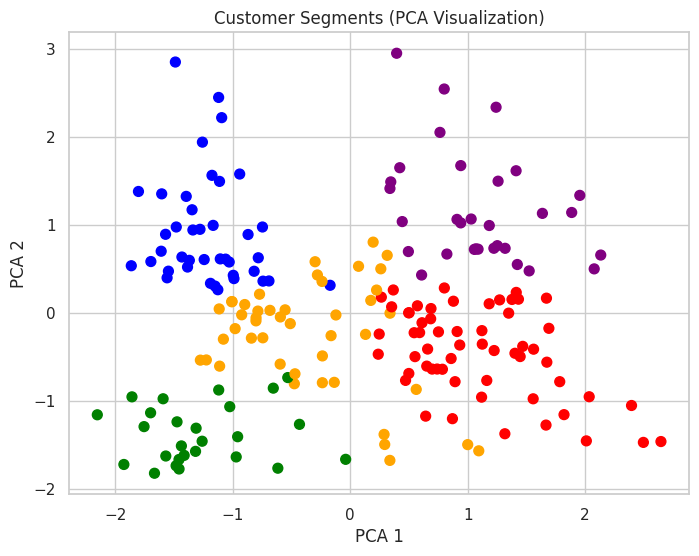

In [26]:
from matplotlib.colors import ListedColormap

pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(components[:,0], components[:,1], c=df['Cluster'], cmap=ListedColormap(['red','blue','green','orange','purple']), s=50)
plt.title("Customer Segments (PCA Visualization)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")

# Save the plot as an image
plt.savefig('pca_clusters.png')

plt.show()


In [21]:
cluster_summary = df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
print("Cluster Summary (Mean Values):")
print(cluster_summary)


Cluster Summary (Mean Values):
               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        55.275862           47.620690               41.706897
1        32.875000           86.100000               81.525000
2        25.769231           26.115385               74.846154
3        26.733333           54.311111               40.911111
4        44.387097           89.774194               18.483871


### Cluster 0: High Income & High Spending
- Strategy: Premium memberships, exclusive offers, luxury product promotions.

### Cluster 1: High Income & Low Spending
- Strategy: Personalized engagement campaigns to increase activity and loyalty.

### Cluster 2: Low Income & High Spending
- Strategy: Discount bundles and reward programs to retain value-focused customers.

### Cluster 3: Young Moderate Spenders
- Strategy: Social media campaigns, flash sales, and loyalty incentives.

### Cluster 4: Conservative Spenders
- Strategy: Emphasize value-for-money products and seasonal promotions.


**Conclusion**

1. K-Means successfully segmented customers into 5 distinct groups.
2. Each cluster shows unique behavioral and financial traits.
3. Actionable strategies can be tailored per segment for targeted marketing.
4. PCA visualization makes the clusters easy to interpret and present.